<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset-utilizado" data-toc-modified-id="Dataset-utilizado-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset utilizado</a></span><ul class="toc-item"><li><span><a href="#Número-de-amostras-e-colunas" data-toc-modified-id="Número-de-amostras-e-colunas-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Número de amostras e colunas</a></span></li><li><span><a href="#Vitórias-por-time" data-toc-modified-id="Vitórias-por-time-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Vitórias por time</a></span></li></ul></li><li><span><a href="#Separar-dados-para-treinamento" data-toc-modified-id="Separar-dados-para-treinamento-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Separar dados para treinamento</a></span></li><li><span><a href="#Treinar-modelos-de-classificação" data-toc-modified-id="Treinar-modelos-de-classificação-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Treinar modelos de classificação</a></span><ul class="toc-item"><li><span><a href="#Declarando-modelos" data-toc-modified-id="Declarando-modelos-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Declarando modelos</a></span></li><li><span><a href="#Treinamento" data-toc-modified-id="Treinamento-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Treinamento</a></span></li></ul></li><li><span><a href="#Mostrando-e-salvando-Resultados" data-toc-modified-id="Mostrando-e-salvando-Resultados-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mostrando e salvando Resultados</a></span><ul class="toc-item"><li><span><a href="#Salvando-resultados-dos-modelos" data-toc-modified-id="Salvando-resultados-dos-modelos-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Salvando resultados dos modelos</a></span></li><li><span><a href="#Gráfico-de-comparação" data-toc-modified-id="Gráfico-de-comparação-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Gráfico de comparação</a></span></li></ul></li><li><span><a href="#Conclusão-e-próximos-passos" data-toc-modified-id="Conclusão-e-próximos-passos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusão e próximos passos</a></span></li></ul></div>

---
# Experimento 1: Diferentes modelos com todas as variáveis

**Objetivo do experimento:** Comparar o modelo _baseline_ com diferentes modelos utilizando as mesmas variáveis


**Formato do experimento:** Serão utilizadas todas as variáveis do arquivo ``2021-05-01_working_data.csv``. 
1. Os dados serão divididos em 5 conjuntos, onde será aplicada uma validação cruzada;
2. O passo 1 será repetido 3 vezes com os dados sendo separados aleatoriamente em cada uma das vezes;
3. Será calculada a acurácia média destes 15 conjuntos de teste;

**Os seguintes modelos serão usados:**

- KNN
- Random Forest
- Rede Neural
- XGBoost
- Naive Bayes

**Métrica de avaliação:** Acurácia média dos dados de testes nos 15 conjuntos de dados: 3 validações cruzadas, onde cada validação possui 1 conjunto de teste.

---
**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

**Loading data**

In [2]:
data_path = '../data/working_data/'
file = '2021-05-01_working_data.csv'
df_original = pd.read_csv(data_path+file)

**Setting output path**

In [12]:
output_savepath = '../3.Experiments_output/01.Exp_Todas_Variaveis_Varios_Modelos/'

---
## Dataset utilizado

Por se tratar do modelo de baseline os dados referentes à lobby_type e game_mode não foram removidos. 


### Número de amostras e colunas

In [3]:
print('Número total de amostras:', df_original.shape)
print('Colunas:\n', df_original.columns)
df_original.head()

Número total de amostras: (46000, 15)
Colunas:
 Index(['radiant_win', 'avg_mmr', 'duration', 'lobby_type', 'game_mode',
       'Radiant 1', 'Radiant 2', 'Radiant 3', 'Radiant 4', 'Radiant 5',
       'Dire 1', 'Dire 2', 'Dire 3', 'Dire 4', 'Dire 5'],
      dtype='object')


,radiant_win,avg_mmr,duration,lobby_type,game_mode,Radiant 1,Radiant 2,Radiant 3,Radiant 4,Radiant 5,Dire 1,Dire 2,Dire 3,Dire 4,Dire 5
0,1,3439,1649,7,22,121,119,2,13,70,129,83,80,63,30
1,1,3774,1848,0,22,109,10,108,128,84,123,69,67,73,71
2,1,3311,1951,7,22,129,81,35,88,5,32,135,37,121,126
3,1,3408,995,0,22,83,56,17,62,9,26,32,51,6,135
4,0,4621,1818,7,22,11,100,26,44,2,135,42,25,30,74


**Informações gerais**

In [4]:
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
radiant_win,46000.0,0.530957,0.499046,0.0,0.0,1.0,1.0,1.0
avg_mmr,46000.0,3822.560239,514.104856,3200.0,3439.0,3709.0,4071.0,8330.0
duration,46000.0,2350.531696,550.404877,368.0,1983.0,2297.0,2660.0,6327.0
lobby_type,46000.0,5.602370,2.805421,0.0,7.0,7.0,7.0,9.0
game_mode,46000.0,19.115022,6.796624,2.0,22.0,22.0,22.0,22.0
Radiant 1,46000.0,57.555478,38.856395,1.0,23.0,51.0,91.0,135.0
Radiant 2,46000.0,57.353152,39.040652,1.0,22.0,50.0,91.0,135.0
Radiant 3,46000.0,57.731457,38.984566,1.0,23.0,51.0,92.0,135.0
Radiant 4,46000.0,57.725739,39.052658,1.0,23.0,51.0,92.0,135.0
Radiant 5,46000.0,57.493348,38.943894,1.0,22.0,50.0,90.0,135.0


### Vitórias por time

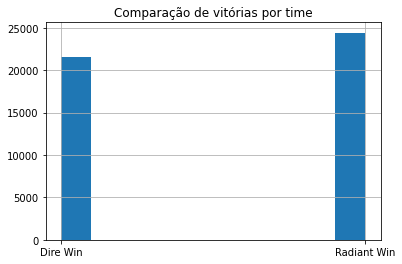

Percentual:


1    0.530957
0    0.469043
Name: radiant_win, dtype: float64

In [5]:
df_original['radiant_win'].hist()
plt.title('Comparação de vitórias por time')
plt.xticks([0,1],['Dire Win', 'Radiant Win'])
plt.show()

print('Percentual:')
df_original['radiant_win'].value_counts(normalize=True)

---
## Separar dados para treinamento

In [6]:
colum_names = df_original.columns

y_column = ['radiant_win']
X_columns = set(colum_names) - set(y_column)

X = df_original[X_columns]
y = df_original[y_column[0]].values


**Configurar os folds para a validação cruzada**

In [7]:
n_folds = 5
repeated_cv = 3
cv = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=repeated_cv, random_state=1)

---
## Treinar modelos de classificação

### Declarando modelos

In [8]:
model_names = ['KNN', 'Random Forest', 'Rede Neural', 'XGBoost', 'Naive Bayes']
scores = [None] * len(model_names)

# Declaring models
KNN_model = KNeighborsClassifier(n_neighbors=5)
RdnForest_model = RandomForestClassifier(n_estimators=300)
RNN_model = MLPClassifier()
XGB_model = XGBClassifier(n_estimators=300)
Naive_model = GaussianNB()

models_lst = [KNN_model, RdnForest_model, RNN_model, XGB_model, Naive_model]

### Treinamento

In [9]:
for i, model in enumerate(models_lst):
    print('---------\nTraining model: ', model_names[i])
    scores[i] = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Model '+model_names[i]+ ' mean score:', round(np.mean(scores[i]),2))

---------
Training model:  KNN
Model KNN mean score: 0.51
---------
Training model:  Random Forest
Model Random Forest mean score: 0.53
---------
Training model:  Rede Neural
Model Rede Neural mean score: 0.51
---------
Training model:  XGBoost
Model XGBoost mean score: 0.53
---------
Training model:  Naive Bayes
Model Naive Bayes mean score: 0.53


---
## Mostrando e salvando Resultados

### Salvando resultados dos modelos

In [28]:
result_df = pd.DataFrame()
for i, name in enumerate(model_names):
    series_result = pd.DataFrame(scores[i], columns=[name])
    result_df = pd.concat([result_df, series_result], axis=1)
    
display(result_df)
result_df.to_csv(output_savepath+'score_exp01.csv', index=False)

,KNN,Random Forest,Rede Neural,XGBoost,Naive Bayes
0,0.508913,0.535326,0.469130,0.535000,0.538261
1,0.524457,0.533804,0.525435,0.534457,0.533587
2,0.516848,0.534783,0.530761,0.538370,0.527826
3,0.516413,0.537391,0.509891,0.533043,0.531304
4,0.508370,0.532283,0.473152,0.526957,0.539130
5,0.508152,0.535870,0.530761,0.535543,0.530652
6,0.509565,0.524565,0.533152,0.530217,0.532717
7,0.514130,0.539022,0.470109,0.529348,0.532283
8,0.515435,0.537826,0.488587,0.538478,0.538261
9,0.520978,0.535543,0.530870,0.539022,0.533804


### Gráfico de comparação

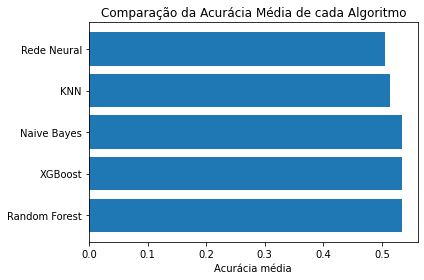

In [68]:
width_plot = result_df.mean().sort_values(ascending=False)

x_plot = width_plot.index.values

plt.barh(y=x_plot, width=width_plot)
plt.title('Comparação da Acurácia Média de cada Algoritmo')
plt.xlabel('Acurácia média')
plt.tight_layout()

plt.savefig(output_savepath+'comparacao_acuracia_modelos_exp01')

---
## Conclusão e próximos passos

Os modelos Random Forest, XGBoost e Naive Bayes tiveram uma acurácia média próximo de 53%, um resultado próximo da acurácia do modelo baseline de 53.46%. Estes resultados ainda indicam uma decisão muito próxima de uma decisão aleatória. Os próximos passos devem consistir de:

1. Testar estes diferentes modelos focando em um mesmo tipo de lobby_type e game_mode;
2. Fazer um modelo para cada 'tier' de jogadores, usando o mmr médio para esta filtragem.